# Manas Khare

## Prediction of optimum number of clusters for iris dataset and it's visualisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Iris.csv').iloc[:, 1:]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, [-1]].values

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
print(dataset.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Exploratory Data Analysis

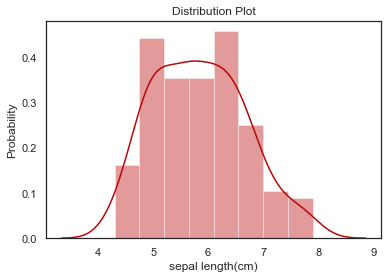

In [8]:
import seaborn as sns
sns.set(style="white",palette="OrRd_r")
sns.distplot(dataset['SepalLengthCm'])
plt.xlabel('sepal length(cm)')
plt.ylabel('Probability')
plt.title('Distribution Plot')
plt.show()

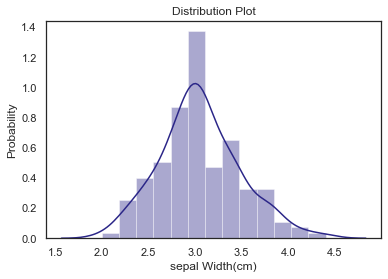

In [9]:
import seaborn as sns
sns.set(style="white",palette="CMRmap")
sns.distplot(dataset['SepalWidthCm'])
plt.xlabel('sepal Width(cm)')
plt.ylabel('Probability')
plt.title('Distribution Plot')
plt.show()

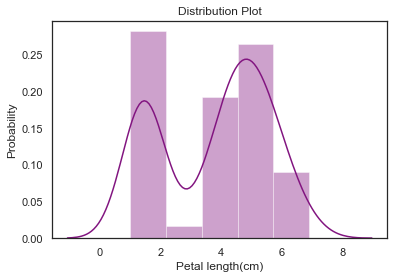

In [10]:
import seaborn as sns
sns.set(style="white",palette="BuPu_r")
sns.distplot(dataset['PetalLengthCm'])
plt.xlabel('Petal length(cm)')
plt.ylabel('Probability')
plt.title('Distribution Plot')
plt.show()

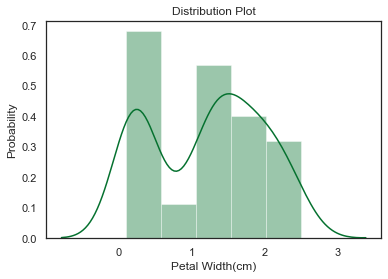

In [11]:
import seaborn as sns
sns.set(style="white",palette="Greens_r")
sns.distplot(dataset['PetalWidthCm'],)
plt.xlabel('Petal Width(cm)')
plt.ylabel('Probability')
plt.title('Distribution Plot')
plt.show()

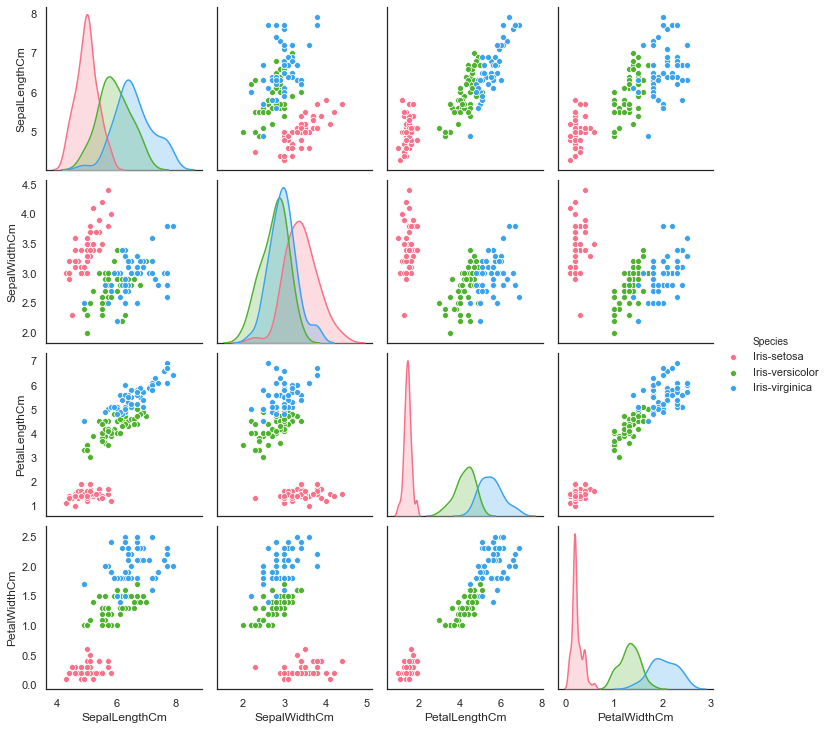

In [12]:
sns.pairplot(dataset,hue="Species",palette="husl")
plt.show()

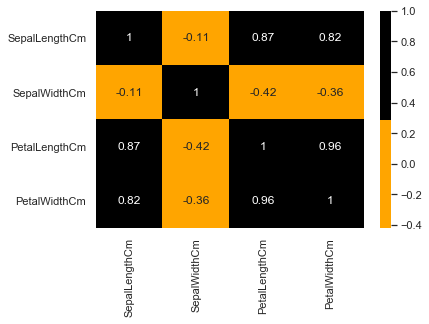

In [13]:
axis = sns.heatmap(dataset.corr(),annot=True,linecolor="white",cmap=['orange','black'])
bottom,top = axis.get_ylim()
axis.set_ylim(bottom,top)
plt.show()

In [14]:
x = dataset.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
with_in_cluster_sum_square = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    Kmeans.fit(x)
    with_in_cluster_sum_square.append(Kmeans.inertia_)

### Plot to observe Elbow

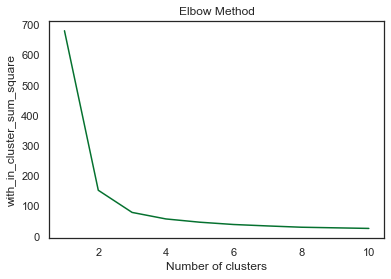

In [16]:
plt.plot(range(1,11),with_in_cluster_sum_square )
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('with_in_cluster_sum_square')
plt.show()


In [17]:
Kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_Kmeans = Kmeans.fit_predict(x)

### Plotting the predictions

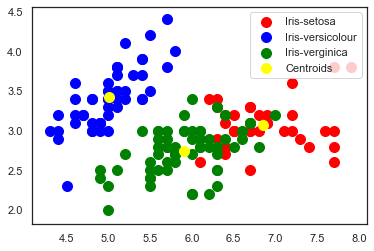

In [18]:
plt.scatter(x[y_Kmeans==0,0],x[y_Kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_Kmeans==1,0],x[y_Kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_Kmeans==2,0],x[y_Kmeans==2,1],s=100,c='green',label='Iris-verginica')
#plotting centroid of cluster
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

##### Thank You!